In [1]:
import torch

In [2]:
embedded_atac_ids = [x.strip() for x in open('input/atac_list.txt')]

In [8]:
chromosomes = [atac_id.split('-', 1)[0] for atac_id  in embedded_atac_ids]

In [10]:
embeddings = torch.load('input/atac_dna_embeddings.torch').detach().cpu().numpy()

In [11]:
embeddings.shape

(116468, 768)

In [12]:
from umap import UMAP

In [13]:
import random

In [14]:
import numpy as np

In [15]:
from matplotlib import pyplot as plt

In [29]:
random_idxs = np.random.choice(np.arange(len(embeddings)), replace=False, size=10000)
random_sample = embeddings[random_idxs,:]

In [30]:
twod = UMAP(n_components=2).fit_transform(random_sample)

In [31]:
random_chrs = [chromosomes[idx] for idx in random_idxs]

In [52]:
cmap = plt.get_cmap('viridis').colors

In [67]:
chromosome_set = set(chromosomes)

In [68]:
chrm_colors = {ch: int(len(chromosome_set) * i/len(cmap)) for i, ch in enumerate(chromosome_set)}

In [69]:
colors = [chrm_colors[chrm] for chrm in random_chrs]

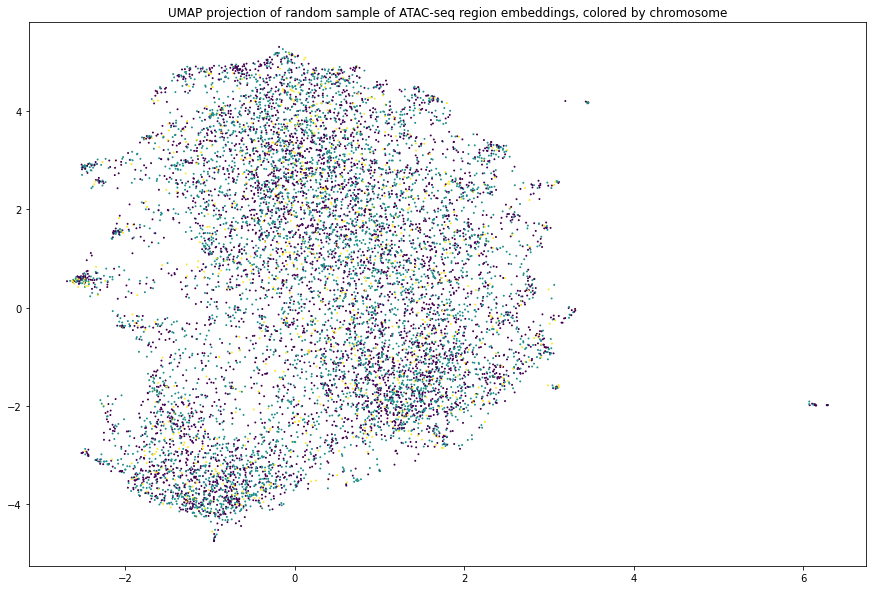

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(twod[:,0], twod[:,1], s=.9, c=colors)
plt.title('UMAP projection of random sample of ATAC-seq region embeddings, colored by chromosome');
# for i in range(len(random_idxs)):
#     if i%50 == 0:
#         plt.annotate(random_chrs[i], twod[i], c='navy')

In [75]:
# Halt execution before getting to the full ATAC embedding
# Have to run the stuff below manually
assert()

AssertionError: 

---------------------

## Below here resets the ATAC embeddings used in training the network

In [11]:
umap = UMAP(n_components=128).fit(random_sample)

In [12]:
proj = umap.transform(embeddings)

In [13]:
proj = torch.tensor(proj)
print(proj.shape)

torch.Size([116468, 128])


In [14]:
torch.save(proj, 'input/projected_atac_sequences.torch')